# 05. Exploratory Data Analysis

### Importando as bibliotecas

In [1]:
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions.fn_stats as fn_stats
import functions.fn_charts as fn_charts
import params.consts as consts

### Lendo o dataset tratado e visualizando o overview atual

In [2]:
df = pd.read_csv(consts.DATASET_LEAN, parse_dates=True, index_col='Date') # Armazenando o dataset em uma variável

In [3]:
pd.options.display.float_format = '{:.2f}'.format # Formatando os dados do dataset com 2 casas decimais

In [4]:
df # Exbindo uma visão geral do dataset

,Open,High,Low,Close,Volume,Daily Variation
Date,,,,,,
2023-11-30 00:00:00-03:00,68.34,68.74,68.08,68.20,29712900,0.01
2023-12-01 00:00:00-03:00,69.01,69.70,68.72,69.46,25025200,0.02
2023-12-04 00:00:00-03:00,68.56,68.80,67.45,67.90,22402300,-0.02
2023-12-05 00:00:00-03:00,67.62,67.75,66.98,67.27,25179500,-0.01
2023-12-06 00:00:00-03:00,67.87,68.26,66.60,66.83,20503900,-0.01
...,...,...,...,...,...,...
2024-11-25 00:00:00-03:00,58.18,58.56,58.12,58.17,17444500,-0.00
2024-11-26 00:00:00-03:00,58.29,58.49,57.15,57.43,21406600,-0.01
2024-11-27 00:00:00-03:00,57.87,58.42,57.60,58.13,22121200,0.01


In [5]:
df.shape # Visualizando a quantidade de linhas e colunas do dataset

(252, 6)

In [6]:
df.info() # Exibindo as informações das variáveis do dataset

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-11-30 00:00:00-03:00 to 2024-11-29 00:00:00-03:00
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             252 non-null    float64
 1   High             252 non-null    float64
 2   Low              252 non-null    float64
 3   Close            252 non-null    float64
 4   Volume           252 non-null    int64  
 5   Daily Variation  252 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


In [7]:
fn_stats.describe(df) # Usando a função que exibe as estatísticas das colunas numéricas

,Open,High,Low,Close,Volume,Daily Variation
count,252.00,252.00,252.00,252.00,252.00,252.00
mean,61.23,61.65,60.69,61.14,22937709.13,-0.00
std,3.45,3.48,3.39,3.42,10247815.80,0.01
min,55.90,56.09,55.48,56.00,0.00,-0.05
25%,58.69,59.02,58.15,58.68,16484125.00,-0.01
50%,60.67,61.11,60.21,60.70,20589700.00,-0.00
75%,62.50,62.91,62.05,62.47,26748450.00,0.01
max,71.66,72.21,70.97,71.47,72721200.00,0.06


In [8]:
df.isnull().sum() # Somando todos os valores nulos de cada coluna

Open               0
High               0
Low                0
Close              0
Volume             0
Daily Variation    0
dtype: int64

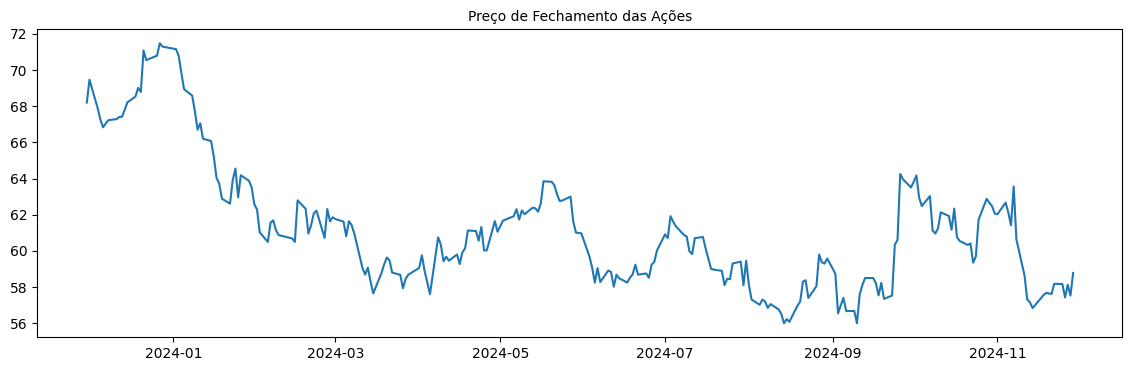

In [9]:
fig, ax = plt.subplots(figsize=(14,4))
plt.plot(df['Close'])
plt.title('Preço de Fechamento das Ações', size = 10)
plt.show()

In [10]:
retorno_diario = df['Close'].pct_change().dropna() # Criando um dataset com as variações diárias

retorno_diario_acumulado = (1 - retorno_diario).cumprod() - 1

retorno_diario_acumulado.max()

0.18608947263119568

In [11]:
media_retorno_diario = np.mean(retorno_diario)
desvio_retorno_diario = np.std(retorno_diario)

print('Média do Retorno de Fechamento:', media_retorno_diario)
print('Desvio Padrão do Retorno de Fechamento:', desvio_retorno_diario)

Média do Retorno de Fechamento: -0.0004944586701208618
Desvio Padrão do Retorno de Fechamento: 0.013995069386276838


In [12]:
print('Retorno Médio Anualizado de Fechamento:', (1 + media_retorno_diario) ** 252 - 1)
print('Desvio Padrão Anualizado de Fechamento:', desvio_retorno_diario *np.sqrt(252))

Retorno Médio Anualizado de Fechamento: -0.11718039817139125
Desvio Padrão Anualizado de Fechamento: 0.22216483906309115


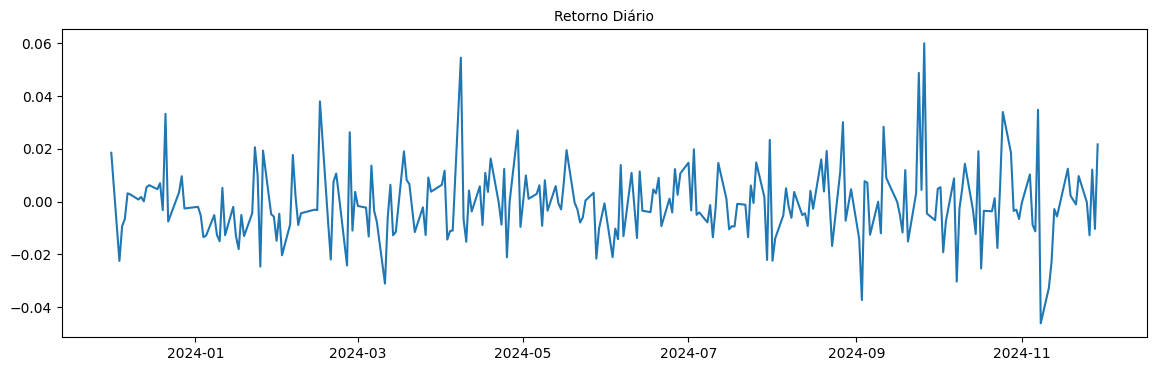

In [13]:
fig, ax = plt.subplots(figsize=(14,4))
plt.plot(retorno_diario)
plt.title('Retorno Diário', size = 10)
plt.show()

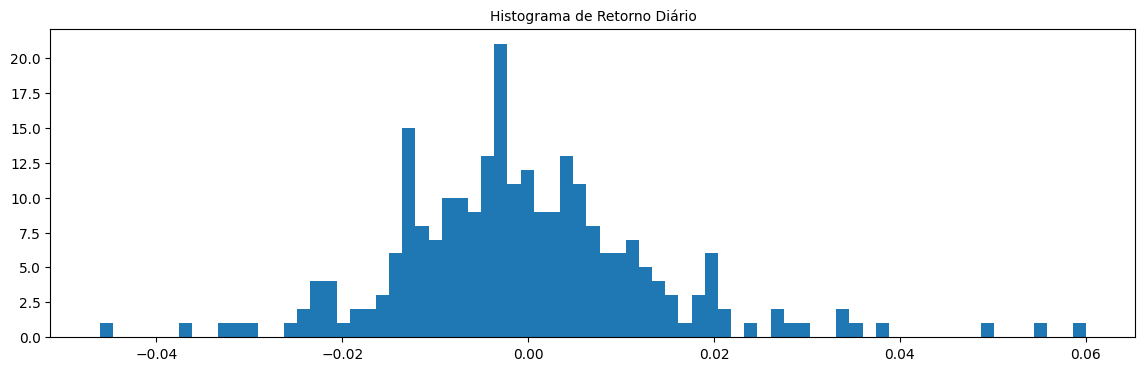

In [14]:
fig, ax = plt.subplots(figsize=(14,4))
plt.hist(retorno_diario, bins=75)
plt.title('Histograma de Retorno Diário', size = 10)
plt.show()

In [15]:
log_retorno_diario = (np.log(df['Close']) - np.log(df['Close']).shift(-1)).dropna()

log_media_retorno_diario = np.mean(log_retorno_diario)
log_desvio_retorno_diario = np.std(log_retorno_diario)

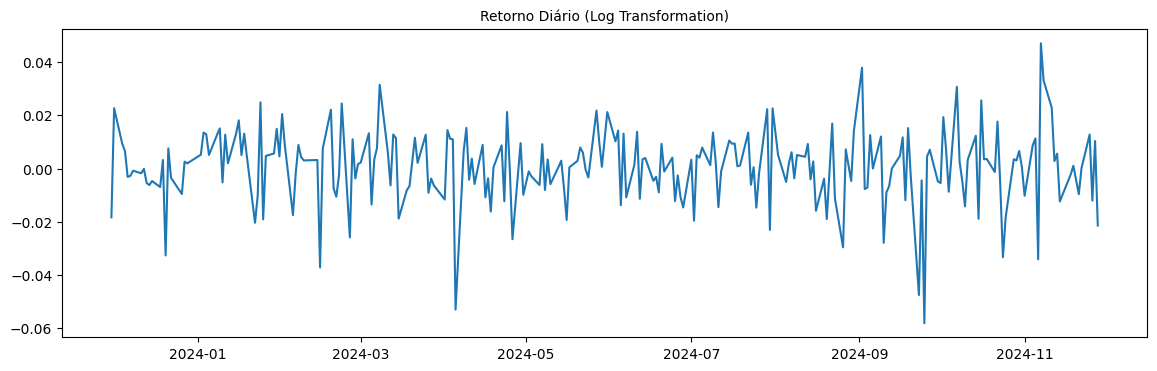

In [16]:
fig, ax = plt.subplots(figsize=(14,4))
plt.plot(log_retorno_diario)
plt.title('Retorno Diário (Log Transformation)', size = 10)
plt.show()

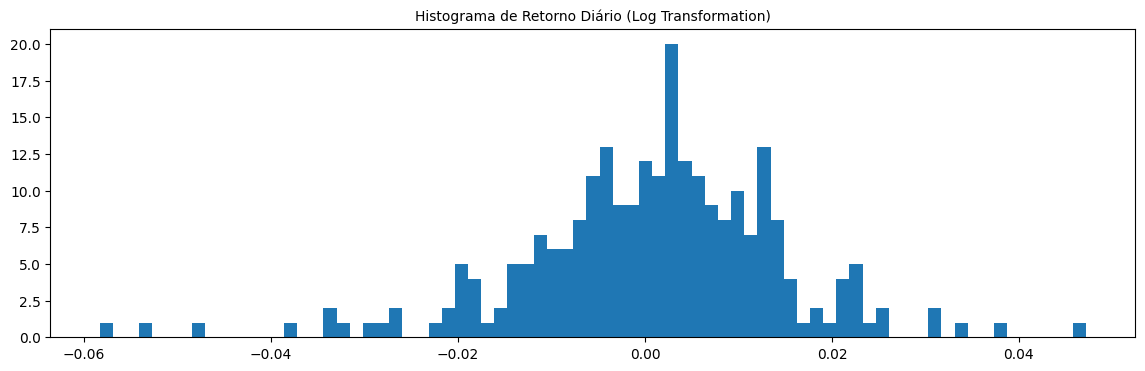

In [17]:
fig, ax = plt.subplots(figsize=(14,4))
plt.hist(log_retorno_diario, bins=75)
plt.title('Histograma de Retorno Diário (Log Transformation)', size = 10)
plt.show()

In [18]:
var_level = 95
var = np.percentile(log_retorno_diario, 100-var_level)
print(f'Certeza de que as perdas diárias não excederão o VaR% em um determinado dia com base em valores históricos.')
print('VAR 95%:', var)

Certeza de que as perdas diárias não excederão o VaR% em um determinado dia com base em valores históricos.
VAR 95%: -0.020966848708768193


In [19]:
var * np.sqrt(5)

-0.04688329898675937

In [20]:
var_level = 95
var = np.percentile(log_retorno_diario, 100-var_level)
cvar = log_retorno_diario[log_retorno_diario < var].mean()
print(f'Nos piores 5% dos casos, as perdas foram, em média, superiores ao percentual histórico.')
print('CVAR 95%:', cvar)

Nos piores 5% dos casos, as perdas foram, em média, superiores ao percentual histórico.
CVAR 95%: -0.03475878960238744


### Simulação de Monte Carlo

In [22]:
dias_posteriores = 180

simulacoes = 2500

ultimo_preco = 58.78

results = np.empty((simulacoes, dias_posteriores))

for s in range(simulacoes):
    
    random_returns = 1 + np.random.normal(
        loc = log_media_retorno_diario, 
        scale = log_desvio_retorno_diario,
        size = dias_posteriores
    )

    result = ultimo_preco * (random_returns.cumprod())

    results[s, :] = result

In [23]:
index = pd.date_range('2024-11-26', periods=dias_posteriores, freq='D')
resultados = pd.DataFrame(results.T, index=index)
media_resultados = resultados.apply('mean', axis=1)

In [24]:
resultados.head()

,0,1,2,3,4,5,6,7,8,9,...,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499
2024-11-26,58.83,59.49,58.04,56.96,58.42,58.75,58.53,57.72,59.41,59.03,...,59.16,58.23,57.77,59.80,58.63,58.52,57.10,58.61,59.14,58.45
2024-11-27,58.20,60.30,57.73,58.01,58.23,58.79,57.97,57.88,60.14,59.45,...,59.67,57.81,56.94,60.31,58.69,59.36,55.30,58.79,58.24,57.98
2024-11-28,55.98,61.40,56.20,56.27,58.50,59.12,57.87,58.66,60.32,59.47,...,61.15,58.40,57.77,60.59,58.01,59.10,56.11,58.69,57.26,58.19
2024-11-29,55.67,62.14,56.08,55.32,59.48,58.79,57.72,58.59,59.34,59.21,...,61.32,57.28,58.74,60.18,59.21,59.97,56.92,59.60,56.79,57.56
2024-11-30,55.97,63.05,56.64,55.74,60.10,58.88,58.32,56.88,58.13,58.29,...,61.67,57.17,58.20,60.71,60.16,58.57,56.20,60.96,56.46,58.30


In [25]:
df['Close']

Date
2023-11-30 00:00:00-03:00   68.20
2023-12-01 00:00:00-03:00   69.46
2023-12-04 00:00:00-03:00   67.90
2023-12-05 00:00:00-03:00   67.27
2023-12-06 00:00:00-03:00   66.83
                             ... 
2024-11-25 00:00:00-03:00   58.17
2024-11-26 00:00:00-03:00   57.43
2024-11-27 00:00:00-03:00   58.13
2024-11-28 00:00:00-03:00   57.53
2024-11-29 00:00:00-03:00   58.78
Name: Close, Length: 252, dtype: float64

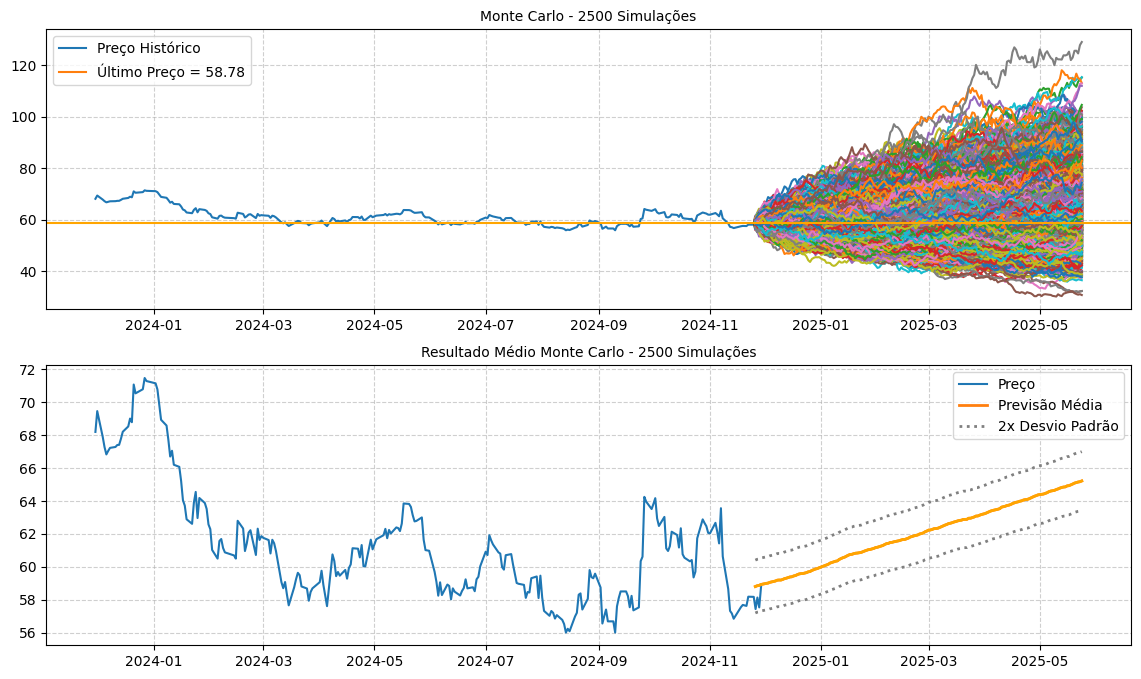

In [26]:
fig, ax = plt.subplots(figsize=(14,8), nrows=2, ncols=1)

ax[0].plot(df['Close'])
ax[0].plot(resultados)
ax[0].axhline(58.78, c='orange')
ax[0].set_title(f'Monte Carlo - {simulacoes} Simulações', size=10)
ax[0].legend(['Preço Histórico', 'Último Preço = 58.78'])
ax[0].grid(True, linestyle='--', alpha=0.6)

ax[1].plot(df['Close'])
ax[1].plot(resultados.apply('mean', axis=1), lw=2)
ax[1].plot(media_resultados.apply((lambda x: x * (1+1.96 * log_desvio_retorno_diario))), lw=2, linestyle = 'dotted', c='gray')
ax[1].plot(media_resultados, lw=2, c='orange')
ax[1].plot(media_resultados.apply((lambda x: x * (1-1.96 * log_desvio_retorno_diario))), lw=2, linestyle = 'dotted', c='gray')
ax[1].set_title(f'Resultado Médio Monte Carlo - {simulacoes} Simulações', size=10)
ax[1].legend(['Preço', 'Previsão Média', '2x Desvio Padrão'])
ax[1].grid(True, linestyle='--', alpha=0.6)

plt.show()